In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point

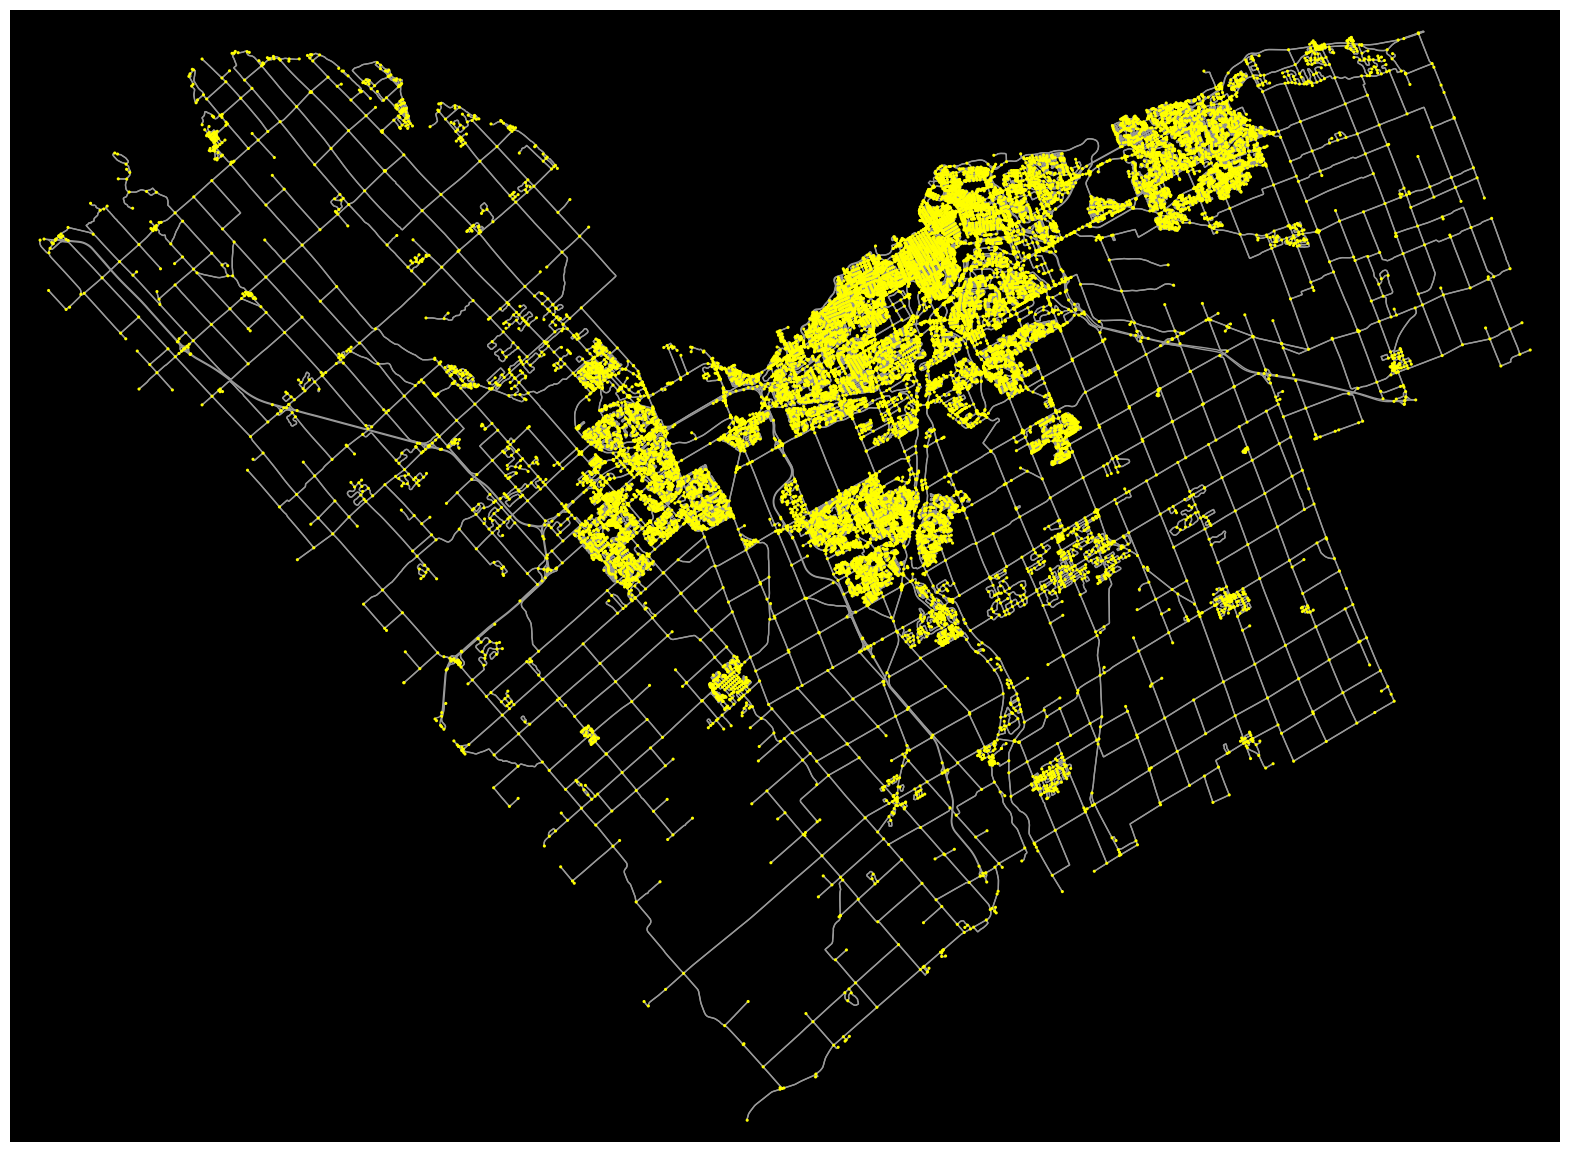

In [2]:
# Define the place to analyze and create a graph of the road network for driving
place_name = "Ottawa, Ontario, Canada"
graph = ox.graph_from_place(place_name, network_type='drive')

# Plot the graph of the road network
fig, ax = ox.plot_graph(
    graph,
    node_color="yellow",  # Set the color of the nodes
    node_size=5,          # Reduce the size of the nodes
    bgcolor="black",       # Optional: Set background color to black for contrast
    figsize=(20, 15)
)

plt.show()

In [3]:
# Convert the graph's nodes and edges into GeoDataFrames
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

In [4]:
# Define the starting and target points (latitude and longitude)
# Replace these with your desired coordinates
start_lat, start_lon = 45.35097741329082, -76.0368709328215  # Carp Splash Pad
target_lat, target_lon = 45.44849666680075, -75.5147269512366  # Landmark Cinemas Orléans

# Convert the start and target lat/lon to shapely Points
orig_point = Point(start_lon, start_lat)
target_point = Point(target_lon, target_lat)

# Find the nearest nodes to the origin and target points
orig_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)
target_node = ox.distance.nearest_nodes(graph, X=target_lon, Y=target_lat)

# Retrieve data about the nearest nodes from the nodes GeoDataFrame
o_closest = nodes.loc[orig_node]  # Nearest node to the origin
t_closest = nodes.loc[target_node]  # Nearest node to the target

# Print the IDs of the origin and target nodes
print(f"Origin node: {orig_node}")
print(f"Target node: {target_node}")

Origin node: 959907591
Target node: 2564070269


In [5]:
# Calculate the shortest path between the origin and target nodes using edge length as the weight
route = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='length')
print(f"Shortest path: {route}")  # Print the list of node IDs forming the route

Shortest path: [959907591, 959903522, 959905050, 959904069, 959905084, 2706451965, 2706451980, 412680359, 959904289, 899573470, 899572431, 899574390, 891272405, 899580720, 899584486, 899576081, 899583791, 899583829, 899573545, 899578102, 412674592, 832013996, 899586622, 899585323, 899575954, 899573893, 899576517, 899803277, 899804024, 899804506, 899801408, 899800996, 899804433, 899805744, 1747666321, 1747666303, 1747666319, 905117943, 899802568, 899806400, 905116965, 3137833536, 828995131, 4668403918, 3137833427, 1750615909, 899824219, 1750615874, 1750615844, 1750615913, 899832418, 828979752, 828869930, 828990685, 899829897, 899803063, 899806584, 903066709, 2404249509, 899948029, 1521312158, 251254883, 1521312353, 1521312258, 1521312402, 1521312191, 899946754, 899946521, 899946216, 899946177, 899946282, 4323224068, 899948691, 899947819, 899951241, 899950185, 899949815, 899947506, 899981990, 899958673, 3793531990, 899951409, 899954016, 899966027, 899953374, 899972500, 899977740, 8999773

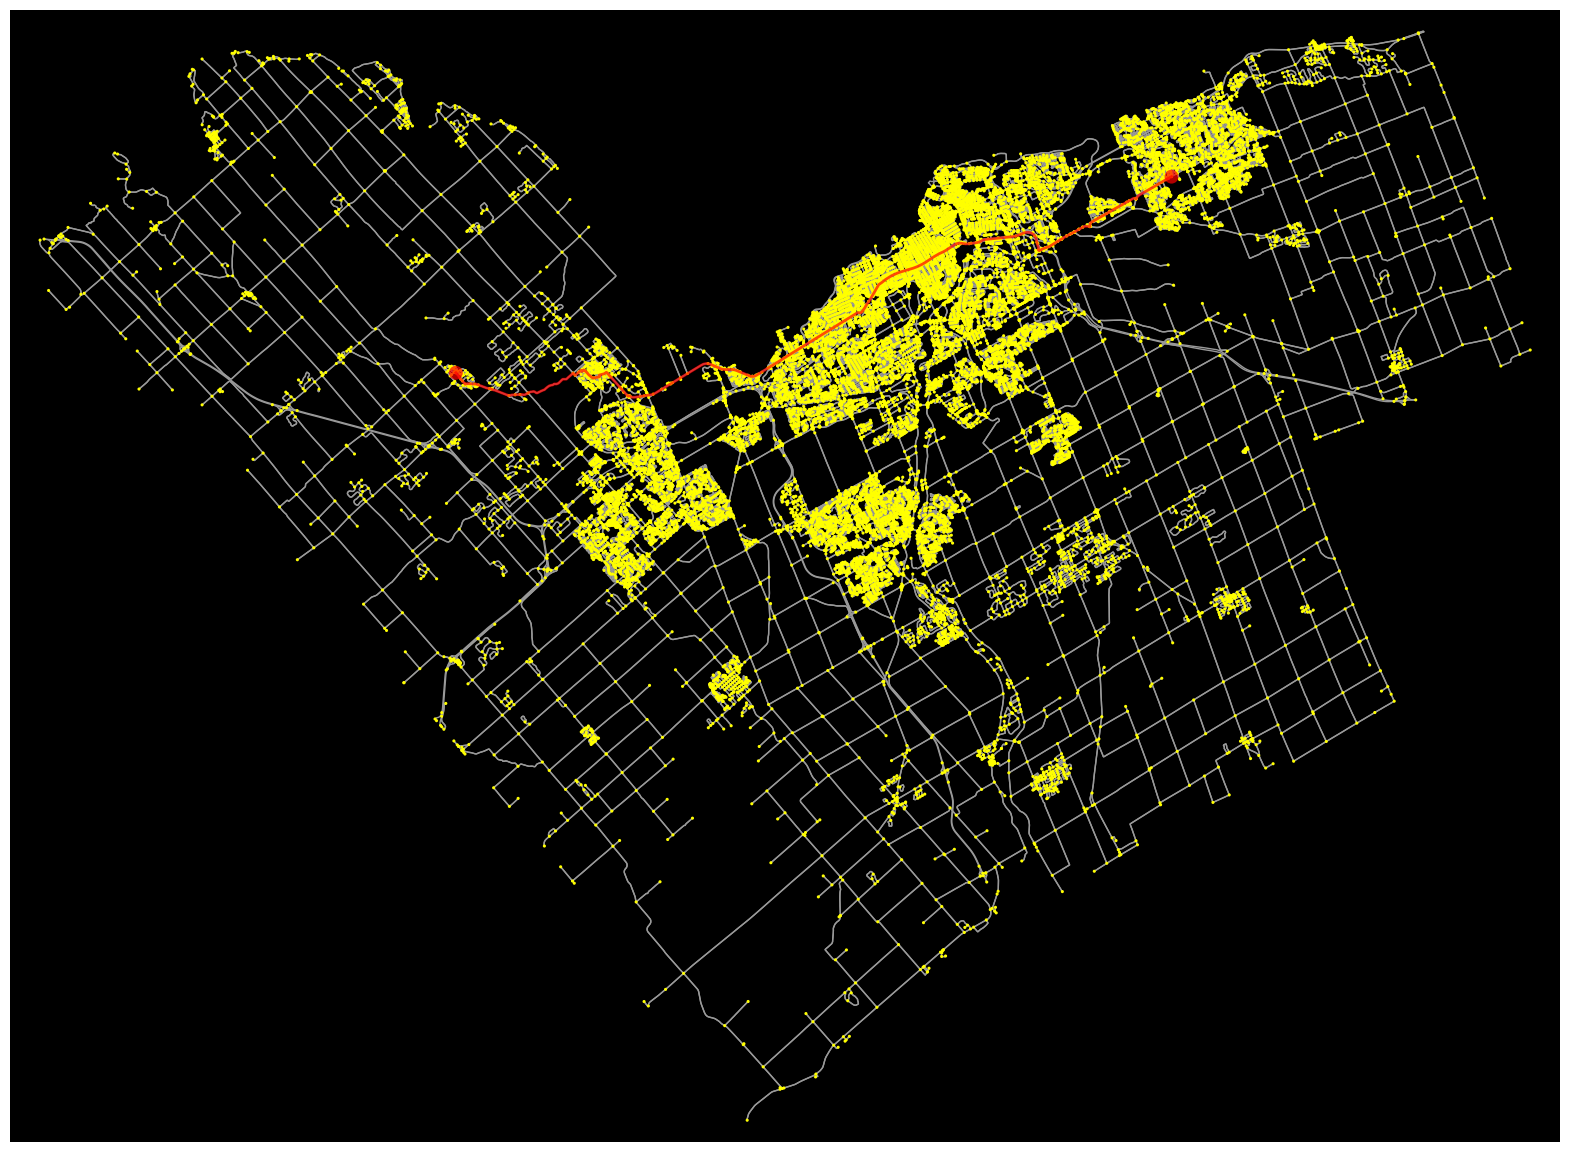

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the graph and overlay the shortest route
fig, ax = ox.plot_graph_route(
    graph, 
    route, 
    route_color="red",         # Color of the route
    route_linewidth=2,         # Thickness of the route
    route_alpha=0.7,           # Transparency of the route
    node_color="yellow",       # Color of the nodes
    node_size=5,               # Size of the nodes
    bgcolor="black",           # Background color of the plot
    figsize=(20, 15)           # Figure size (width, height) in inches
)

# Add markers for the origin and destination points on the graph
ax.scatter([start_lon, target_lon],  # X-coordinates (longitude)
           [start_lat, target_lat],  # Y-coordinates (latitude)
           c=["blue", "green"],      # Colors for origin and destination points
           s=100,                    # Size of the markers
           zorder=5)                 # Place the markers on top of other layers

# Adjust layout to avoid clipping and display the plot
plt.tight_layout()
plt.show()